# Assessment 2019

## Machine Learning and Statistics

### Student: G00364696




### Contents and Assignment Objectives

- [Describe](#Describe)
Use descriptive statistics and plots to describe the Boston House Prices dataset


- [Infer](#Infer)
Use inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that are not.


- [Predict](#Predict)
Use keras to create a neural network that can predict the median house price based on the other variables in the dataset

(Click on link in section title to go to section)

In [9]:
# import Libraries required for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import keras as kr

plt.rcParams['figure.figsize'] = [20,20]

<a id="Describe"></a>

## Describe

### Origin of the dataset:
Each record in the dataset describes a boston suburb or town. The data in the Boston House Price dataser was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) from 1970 and collated in 1978. Each record in the dataset describes a boston suburb or town. There are 506 records in the dataset, with 14 variables representing information that may be related to that town.



These variables are:

- CRIM	
    Per capita crime rate by town
- ZN	
    Proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS	
    Proportion of non-retail business acres per town
- CHAS	
    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX	
    Nitric oxides concentration (parts per 10 million)
- RM	
    Average number of rooms per dwelling
- AGE	
    Proportion of owner-occupied units built prior to 1940
- DIS
    Weighted distances to five Boston employment centres
- RAD	
    Index of accessibility to radial highways
- TAX	
    Full-value property-tax rate per 10,000 USD
- PTRATIO	
    Pupil-teacher ratio by town
- B	1000
    (Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT
    % lower status of the population
- MEDV	
    Median value of owner-occupied homes in $1000's

**This will need to be referenced**

Note that the name of the district is not among the variables.

The "target" variable is MEDV, the median value of owner occupied homes (in $1,000s). A number of previous analyses seem to suggest that 16 data points under MEDV may conatin missing or censored values, and it may be worth considering if these should be removed. 

For this project, a copy of the dataset has been downloaded from the open machine learning website (www.openml.org), although other sources were available. For example, in an earlier version of this project, the data was accessed as a module imported from the sklearn package

A dataframe will be created from this scsv file using the pandas read_csv method. Then summary statistics will be generated using the pandas describe function.



possible adaptations?
A similar dataset could be devised for Irish house prices, taking addresses from the property price register and adding variables relating to the area in which the property is located, e.g. deprivation index (Pobal), number of schools, proximity to public transport and other amenities, educational attainment/occupational status of population etc.

In [3]:
# loading the boston house price dataset and converting to pandas dataframe

boston = pd.read_csv('boston.csv')
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
# Generating summary statistics using the pandas describe method.
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Analysing the variance in median house prices by town/suburb

Our main interest is the house price. Therefore, the first step we should do is to eyeball the values in this field. The snippets of python code in the values in the MEDV field ascending order. To visualise the variance in house prices, a boxplot and then a histogram will be created

In [44]:
# code to create a sorted list of house price values:
l = list(boston['MEDV'])
l.sort()
print(l)
print(sp.stats.mode(l)) # using scipy.stats mode funciton to find the most common value - relevant to analysis below.

[5.0, 5.0, 5.6, 6.3, 7.0, 7.0, 7.2, 7.2, 7.2, 7.4, 7.5, 8.1, 8.3, 8.3, 8.4, 8.4, 8.5, 8.5, 8.7, 8.8, 8.8, 9.5, 9.6, 9.7, 10.2, 10.2, 10.2, 10.4, 10.4, 10.5, 10.5, 10.8, 10.9, 10.9, 11.0, 11.3, 11.5, 11.7, 11.7, 11.8, 11.8, 11.9, 11.9, 12.0, 12.1, 12.3, 12.5, 12.6, 12.7, 12.7, 12.7, 12.8, 13.0, 13.1, 13.1, 13.1, 13.1, 13.2, 13.3, 13.3, 13.3, 13.4, 13.4, 13.4, 13.4, 13.5, 13.5, 13.6, 13.6, 13.8, 13.8, 13.8, 13.8, 13.8, 13.9, 13.9, 14.0, 14.1, 14.1, 14.1, 14.2, 14.3, 14.3, 14.4, 14.4, 14.5, 14.5, 14.5, 14.6, 14.6, 14.8, 14.9, 14.9, 14.9, 15.0, 15.0, 15.0, 15.1, 15.2, 15.2, 15.2, 15.3, 15.4, 15.4, 15.6, 15.6, 15.6, 15.6, 15.6, 15.7, 16.0, 16.1, 16.1, 16.1, 16.2, 16.2, 16.3, 16.4, 16.5, 16.5, 16.6, 16.6, 16.7, 16.7, 16.8, 16.8, 17.0, 17.1, 17.1, 17.1, 17.2, 17.2, 17.2, 17.3, 17.4, 17.4, 17.4, 17.5, 17.5, 17.5, 17.6, 17.7, 17.8, 17.8, 17.8, 17.8, 17.8, 17.9, 18.0, 18.1, 18.2, 18.2, 18.2, 18.3, 18.3, 18.4, 18.4, 18.4, 18.5, 18.5, 18.5, 18.5, 18.6, 18.6, 18.7, 18.7, 18.7, 18.8, 18.8, 18.9, 18.

Now, we will visualise the variance in the data by way of a boxplot and a histogram.

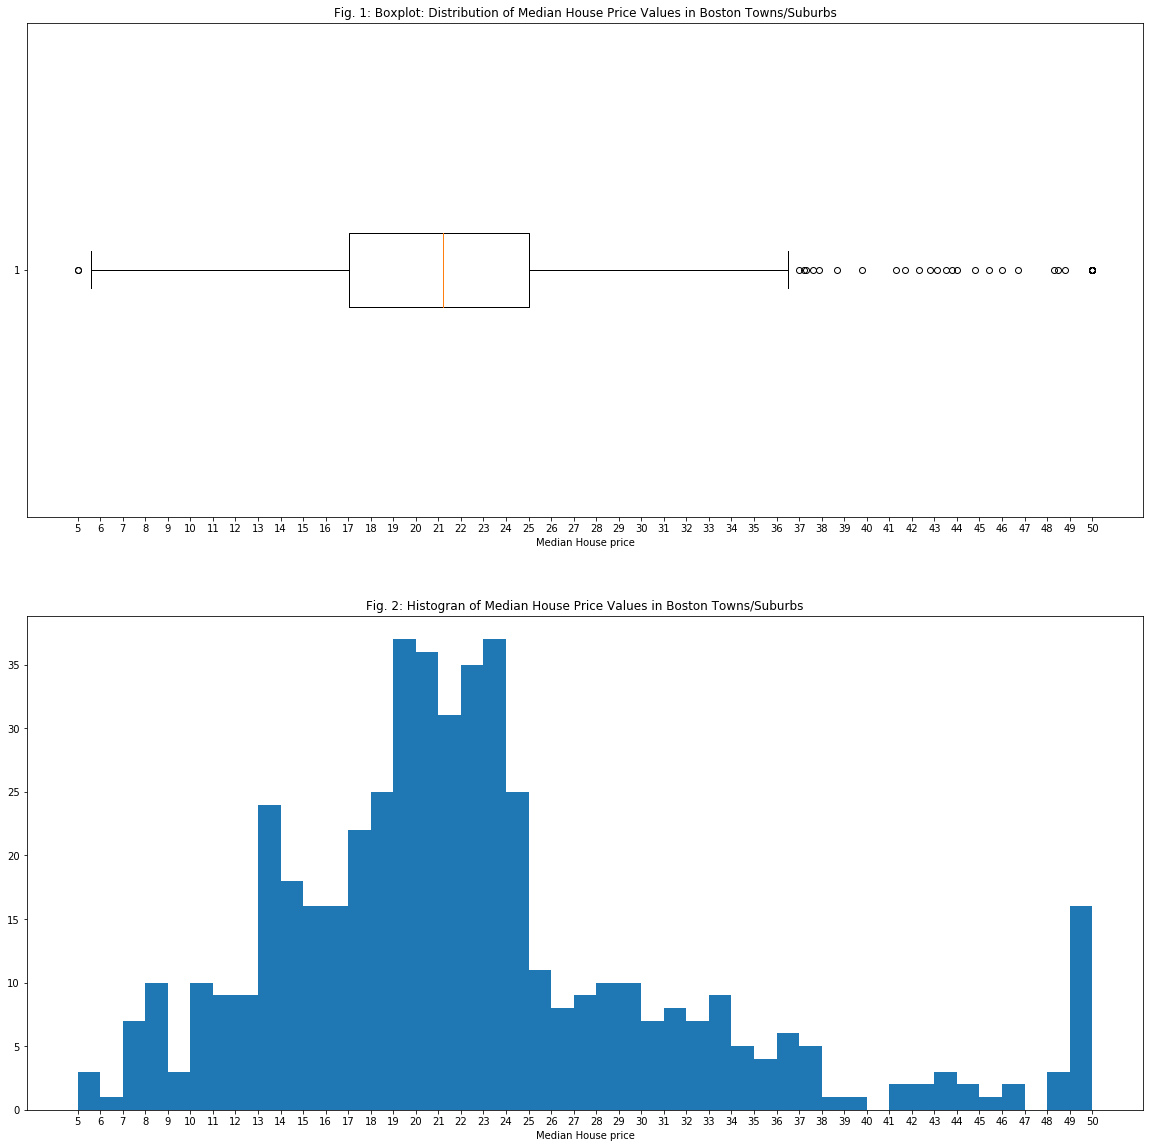

In [43]:
# create a numpy array from the MEDV (median value) column in the boston dataset
price = np.array(boston['MEDV'])

# Create a boxplot using pyplot
plt.subplot(2,1,1)
plt.boxplot(price, vert = False)

plt.title("Fig. 1: Boxplot: Distribution of Median House Price Values in Boston Towns/Suburbs")
plt.xlabel("Median House price")
plt.xticks(np.arange(min(price), max(price)+1, 1.0)) # x label ticks spaced at $ 5,000 intervals 

plt.subplot(2,1,2)
plt.hist(price, bins =np.arange(min(price), max(price)+1, 1.0) )
plt.title("Fig. 2: Histogran of Median House Price Values in Boston Towns/Suburbs")
plt.xlabel("Median House price")
plt.xticks(np.arange(min(price), max(price)+1, 1.0)) # 

plt.show()

### Initial observations. 

As can be seen from the above plots (and the descriptive statistics generated above), the mean price is roughly \\$23K. The boxplot shows a dataset that is centred around this mean with most of values lying between \\$ 17 and about  \\$ 25  (the 25% and 75% percentile points). The histogram shows a dataset which could almost conform to a normal distribution, were it not for the outliers above the \\$ 25K point.

The most common value in the data set is 50, a value that occurs in 16 rows. A number of analysts who have worked on this datset have suggested that that these data points represent missing or censored data values. They do appear as outliers and this approach may have merit.



**Next steps: Exploring relationships**

<a id="Infer"></a>

# Infer

In this section we will perform a two sample t-test to see if there is a significant difference between the median house prices of houses along the Charles river and those that aren't.

Discuss aims of t-test. Two samples. What constitutes significant difference in this context?

Explanation of findings and what we can learn from T-Tests





<a id="Predict"></a>
## Predict

The aim of this section is to create a nueral network using the python package Keras that can predict the median house price based on the other variables in the dataset.

The workings done following the lecture on the dogs database will be used as a template for this section.



- What variables are we going to base the predication on?
- Do we need to create any new variables (e.g. to codify any categorical variables)?
- Decide on input variables
- Decide on output

create the neural network
- instantiate a sequential model
- add layers
- compile model

Train the neural network
- m.fit
- run and make note of loss
- do predictions
- evaluate predictions - compare predicted house prices with actual values (all or a sample?)

Do we need to do anything to improve the performace of the network?

Need to watch final lecture series (Tuning nueral network in order to decide further course of action on this section)




